#### Exercise 3

Import and plot the time series alcohol_sales.

Find the series decomposition.

Plot the components and try to describe them

Analyse residual distribution and try to find out if they follow a normal, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 15.0)
sns.set()

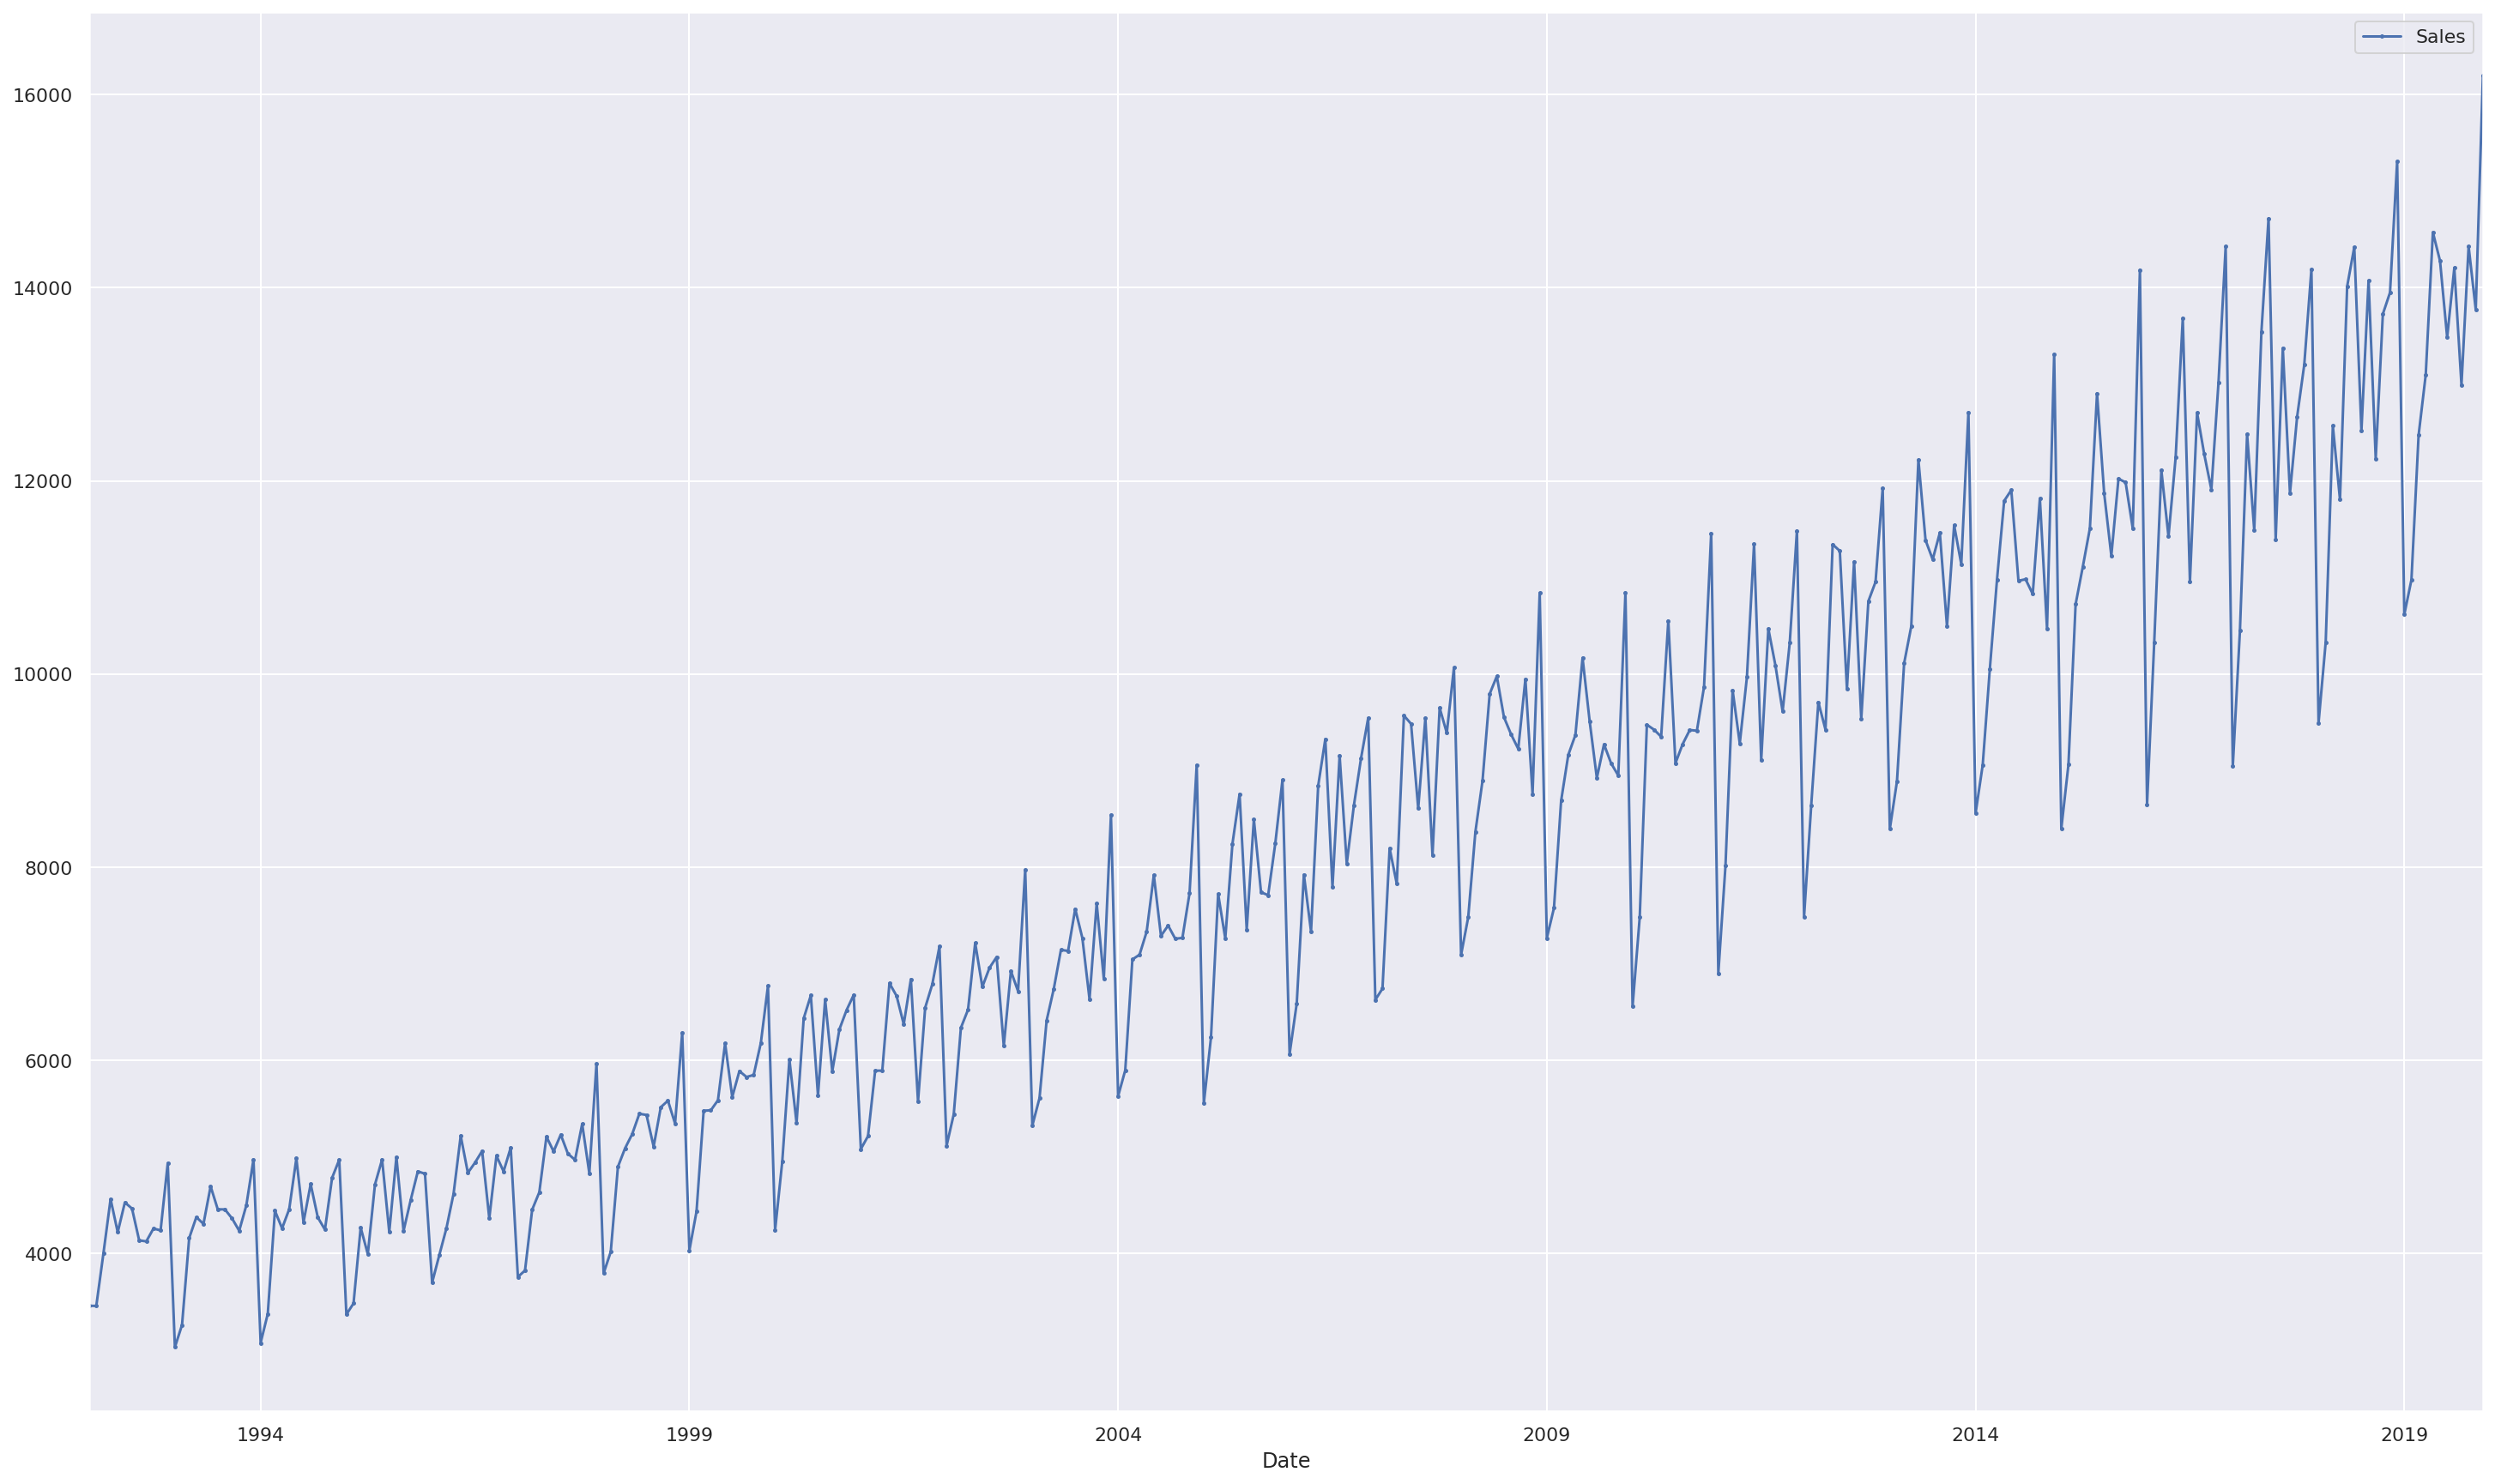

In [ ]:

df = pd.read_csv('alcohol_sales.csv', parse_dates=True, index_col='Date')

subplots = df.plot(figsize=(25, 15),
                   marker='.',
                   markersize=3,
                   linestyle='-',
                   subplots=True)
subplots;

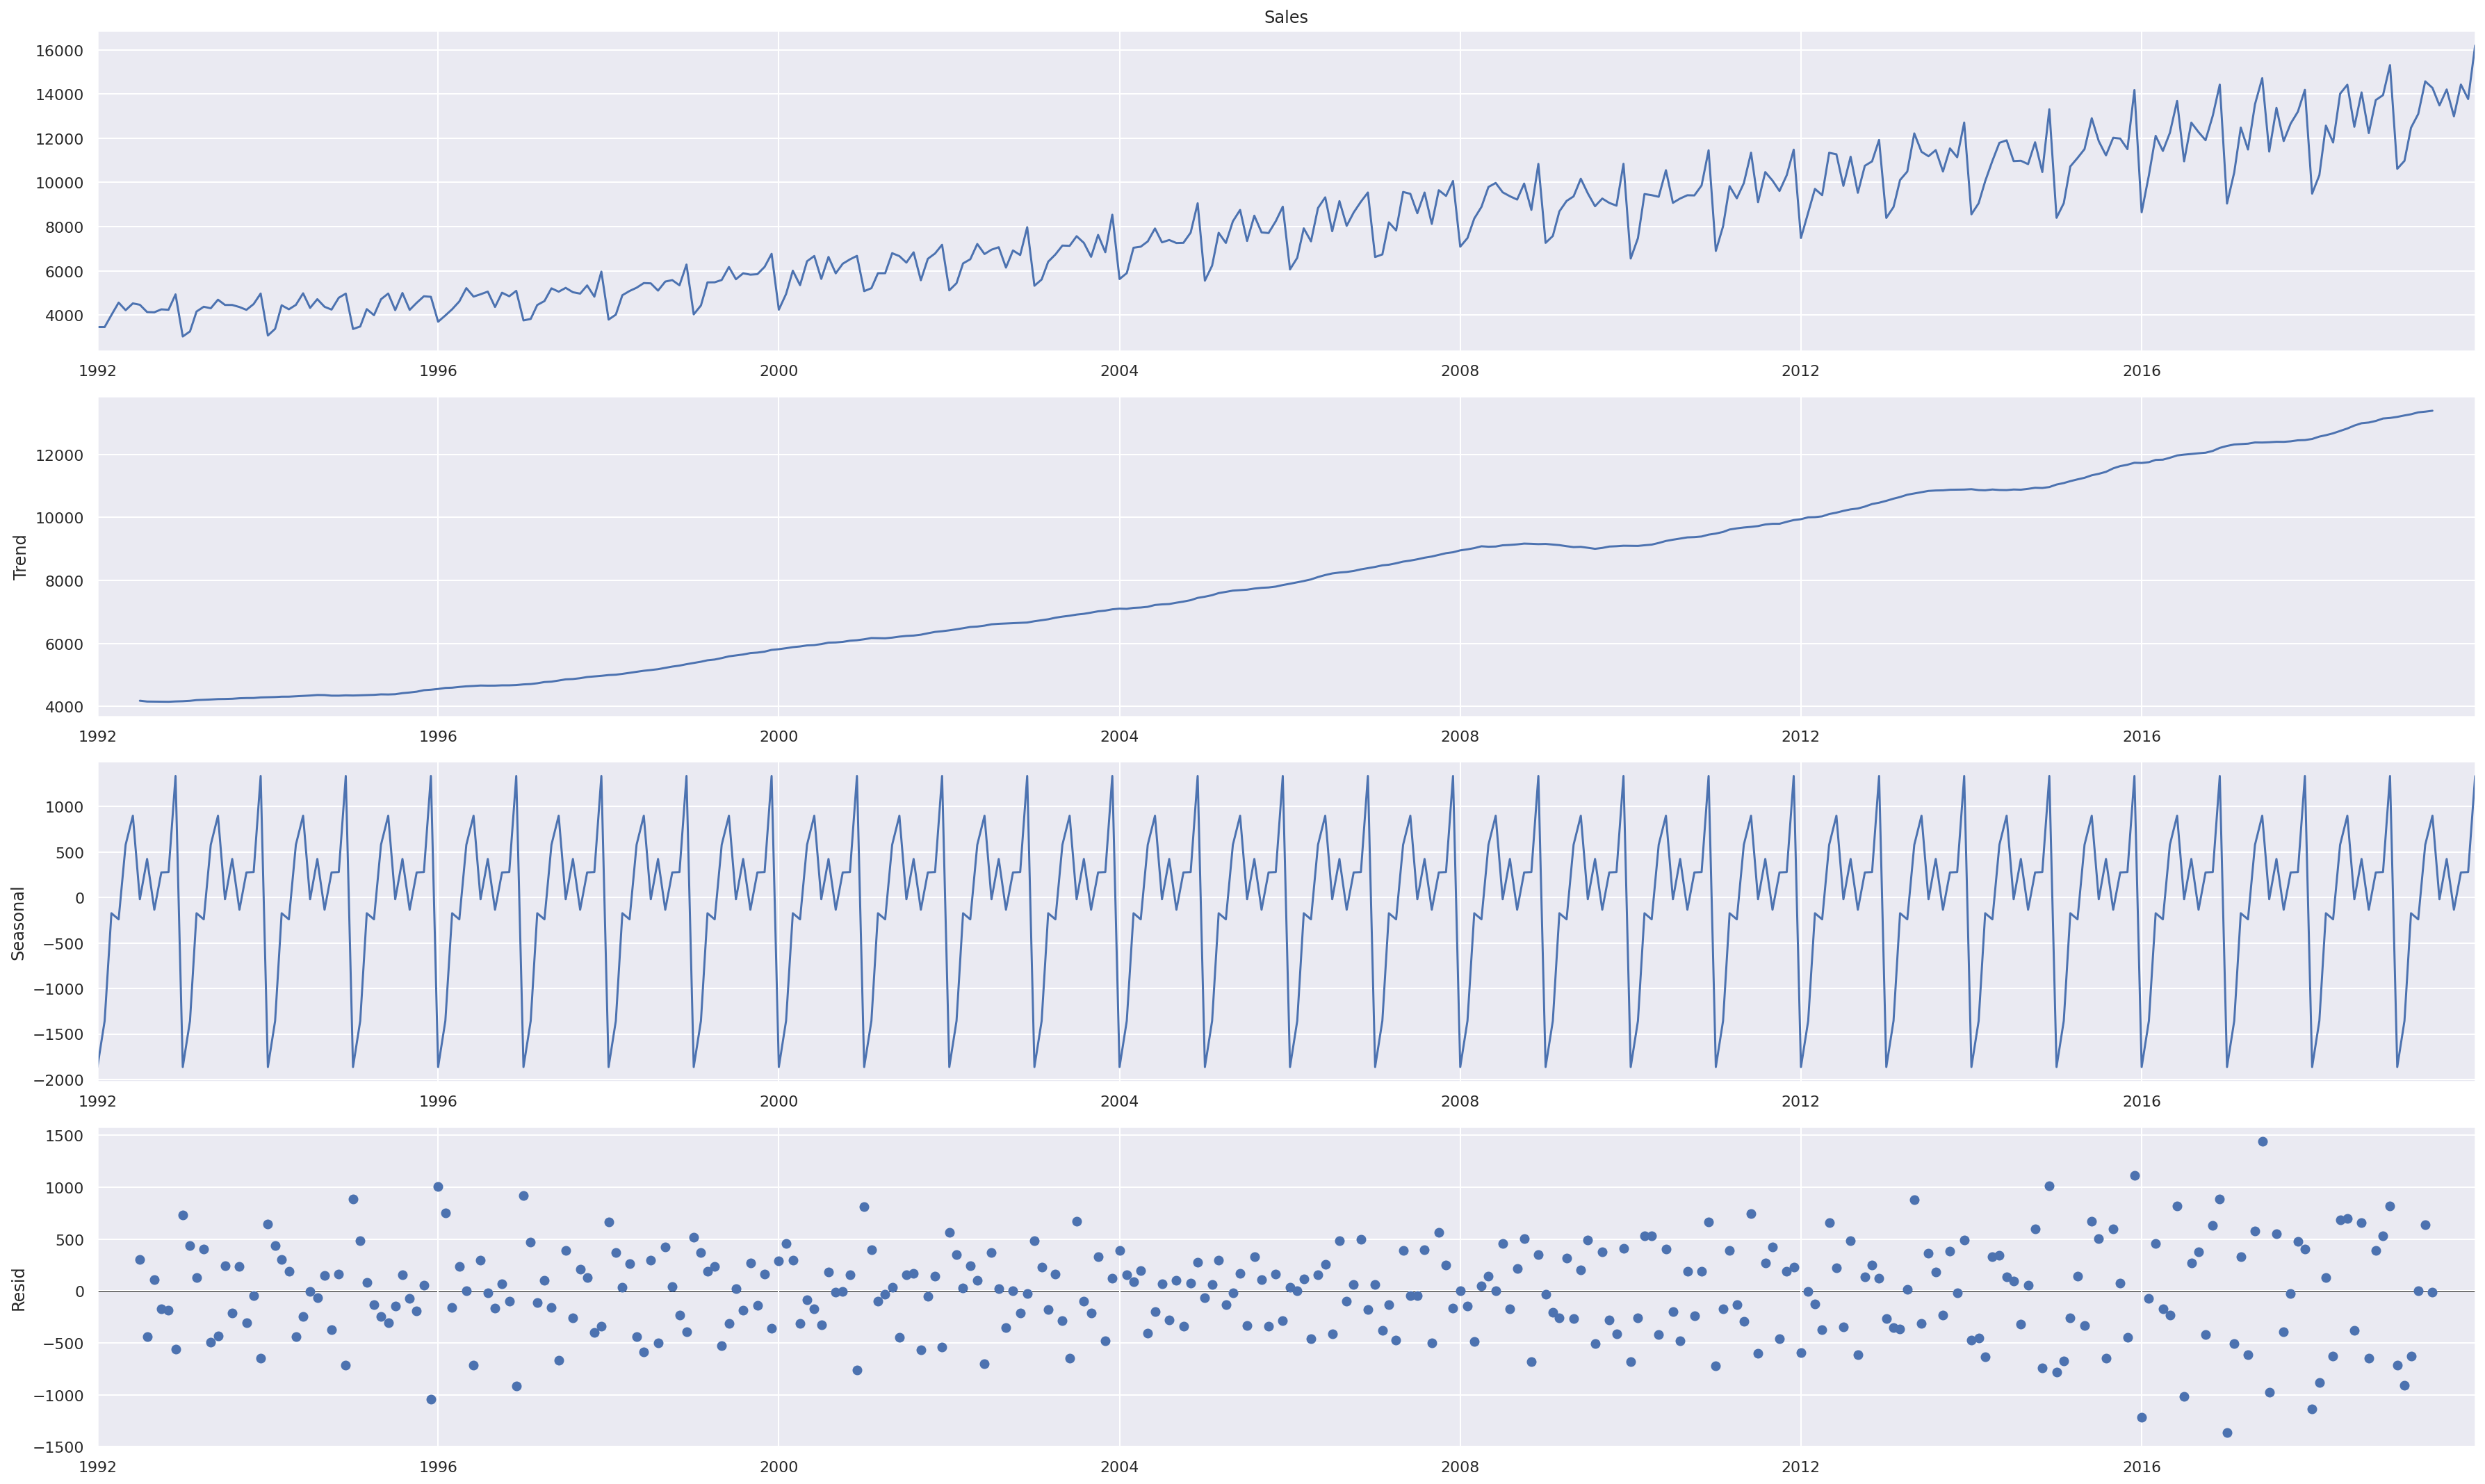

In [ ]:
decomposition = seasonal_decompose(df['Sales'])
plt=decomposition.plot()

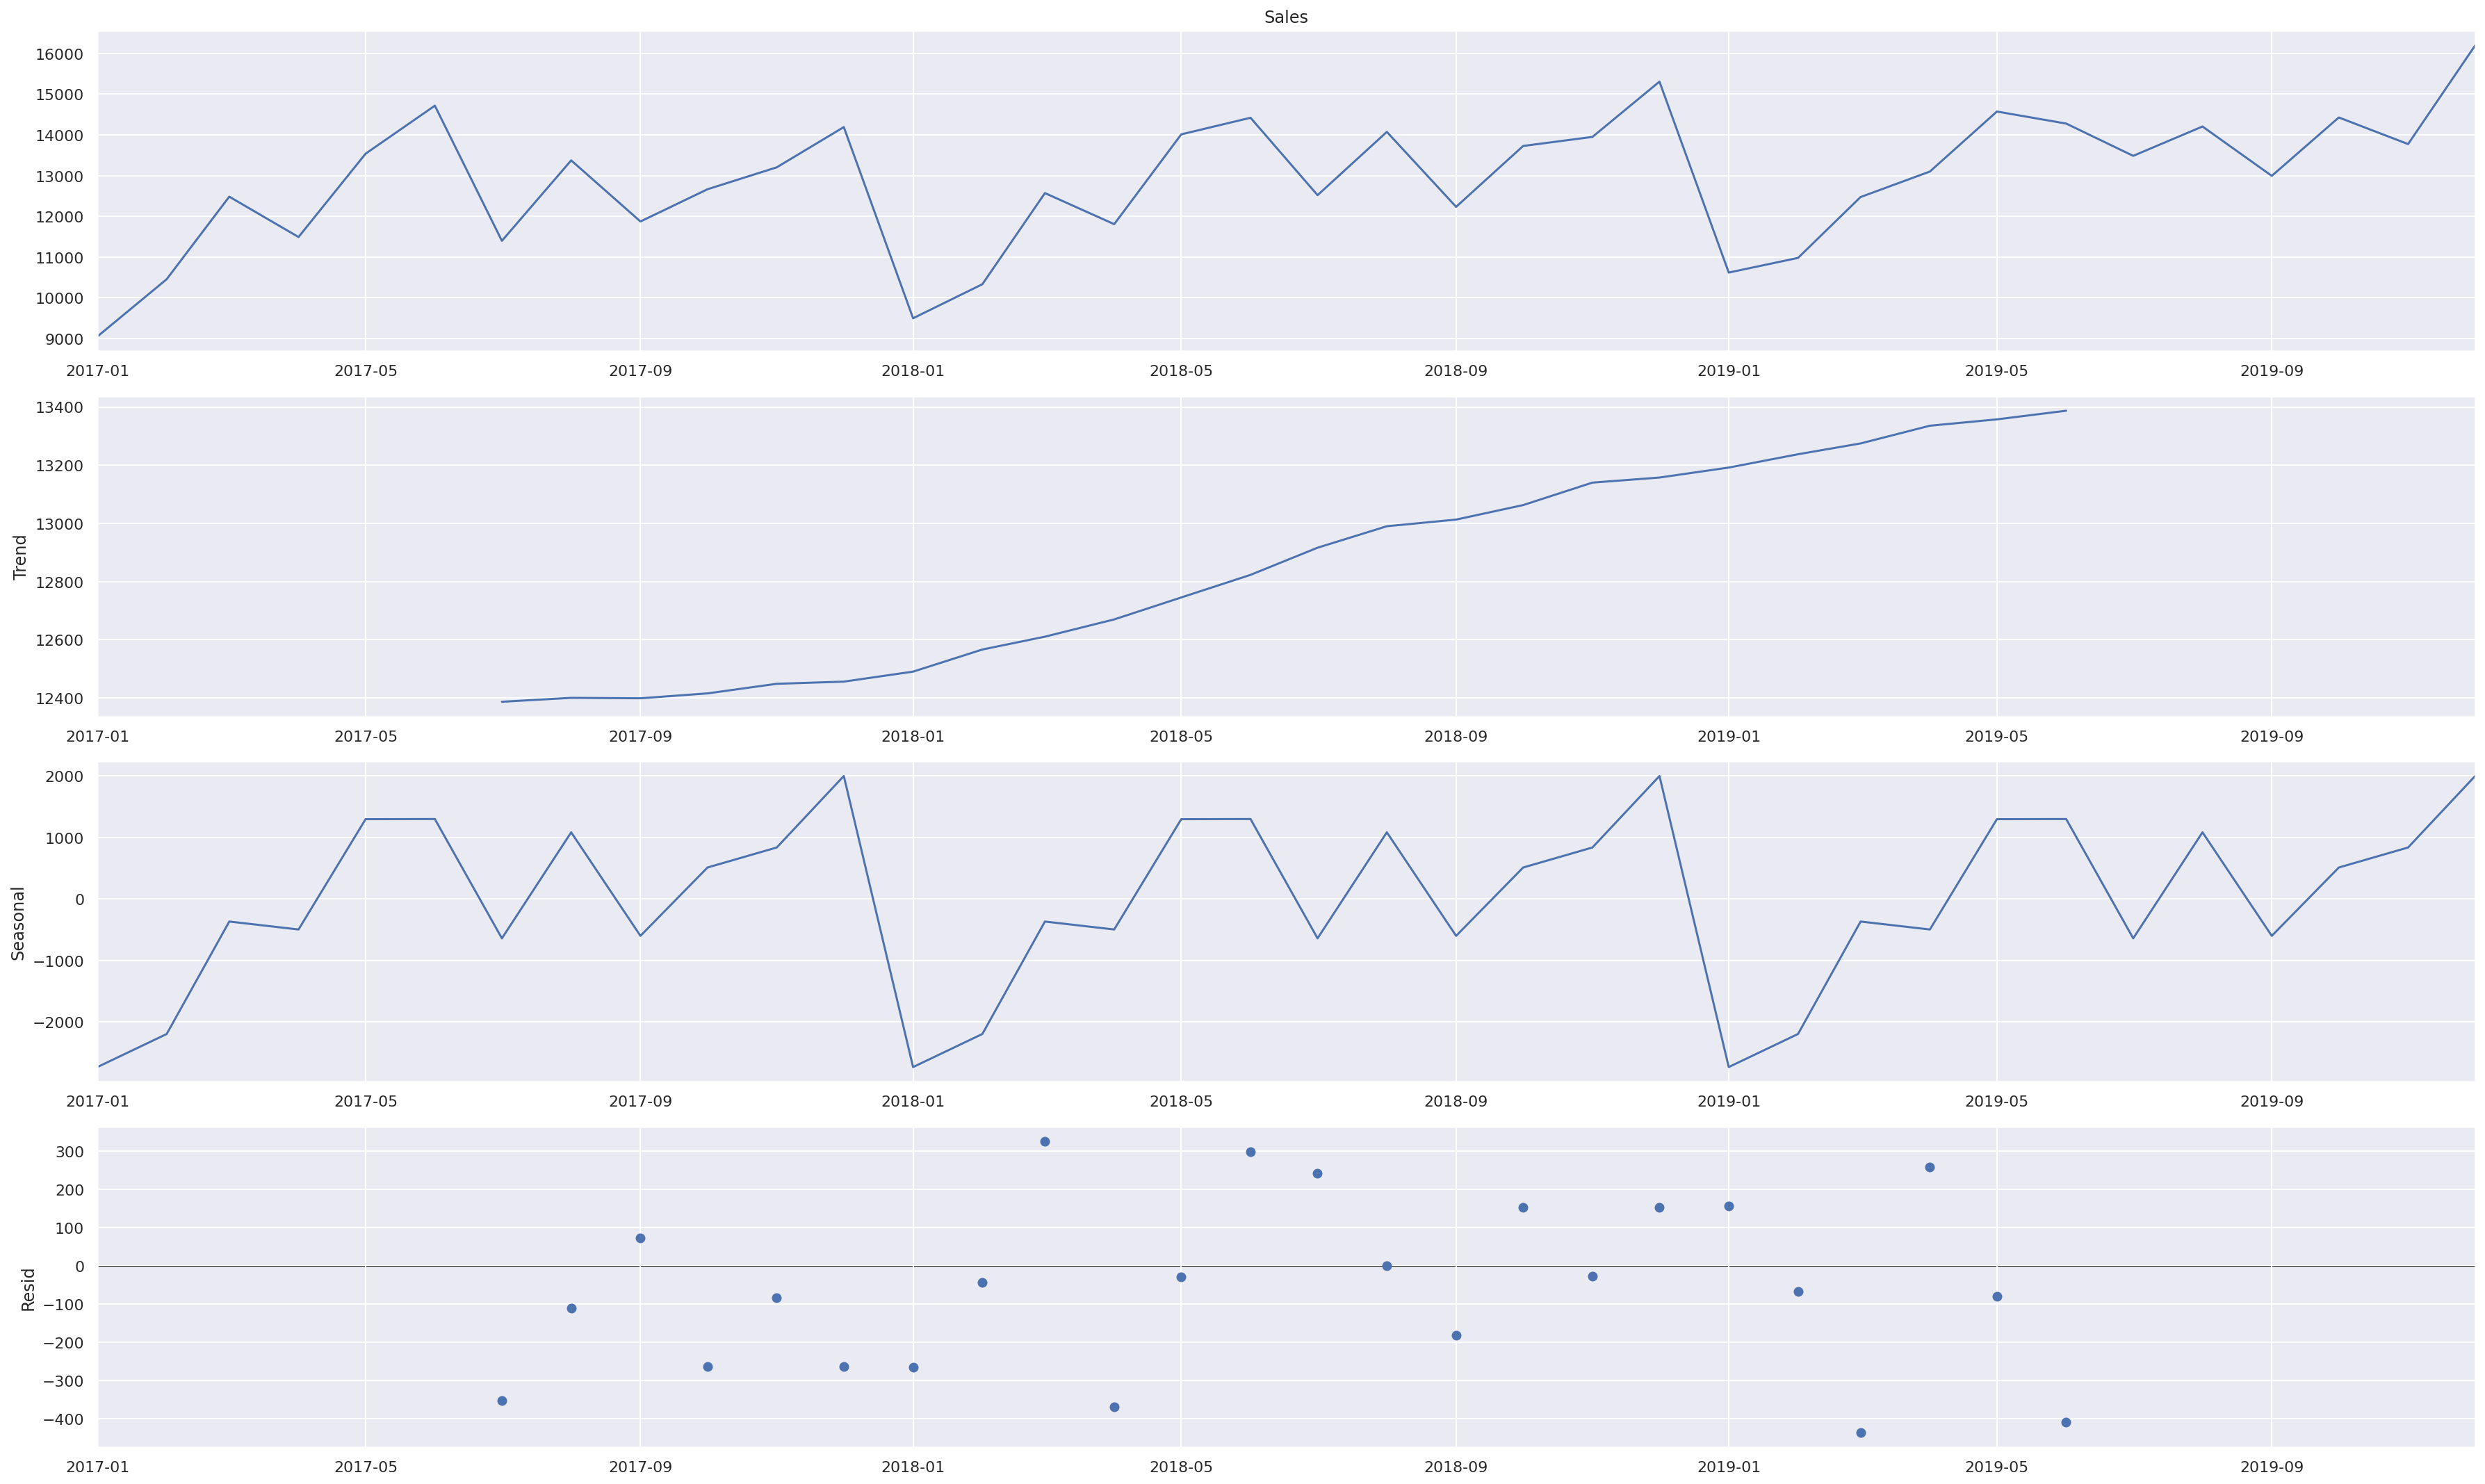

In [ ]:
decomposition = seasonal_decompose(df['Sales']['2017-01':'2019-12'])

plt=decomposition.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Sales'], order=(7, 1, 0))  
results_AR = model.fit()  
print(results_AR.summary())

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  336
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -2789.435
Date:                Mon, 18 Jul 2022   AIC                           5594.870
Time:                        19:52:19   BIC                           5625.383

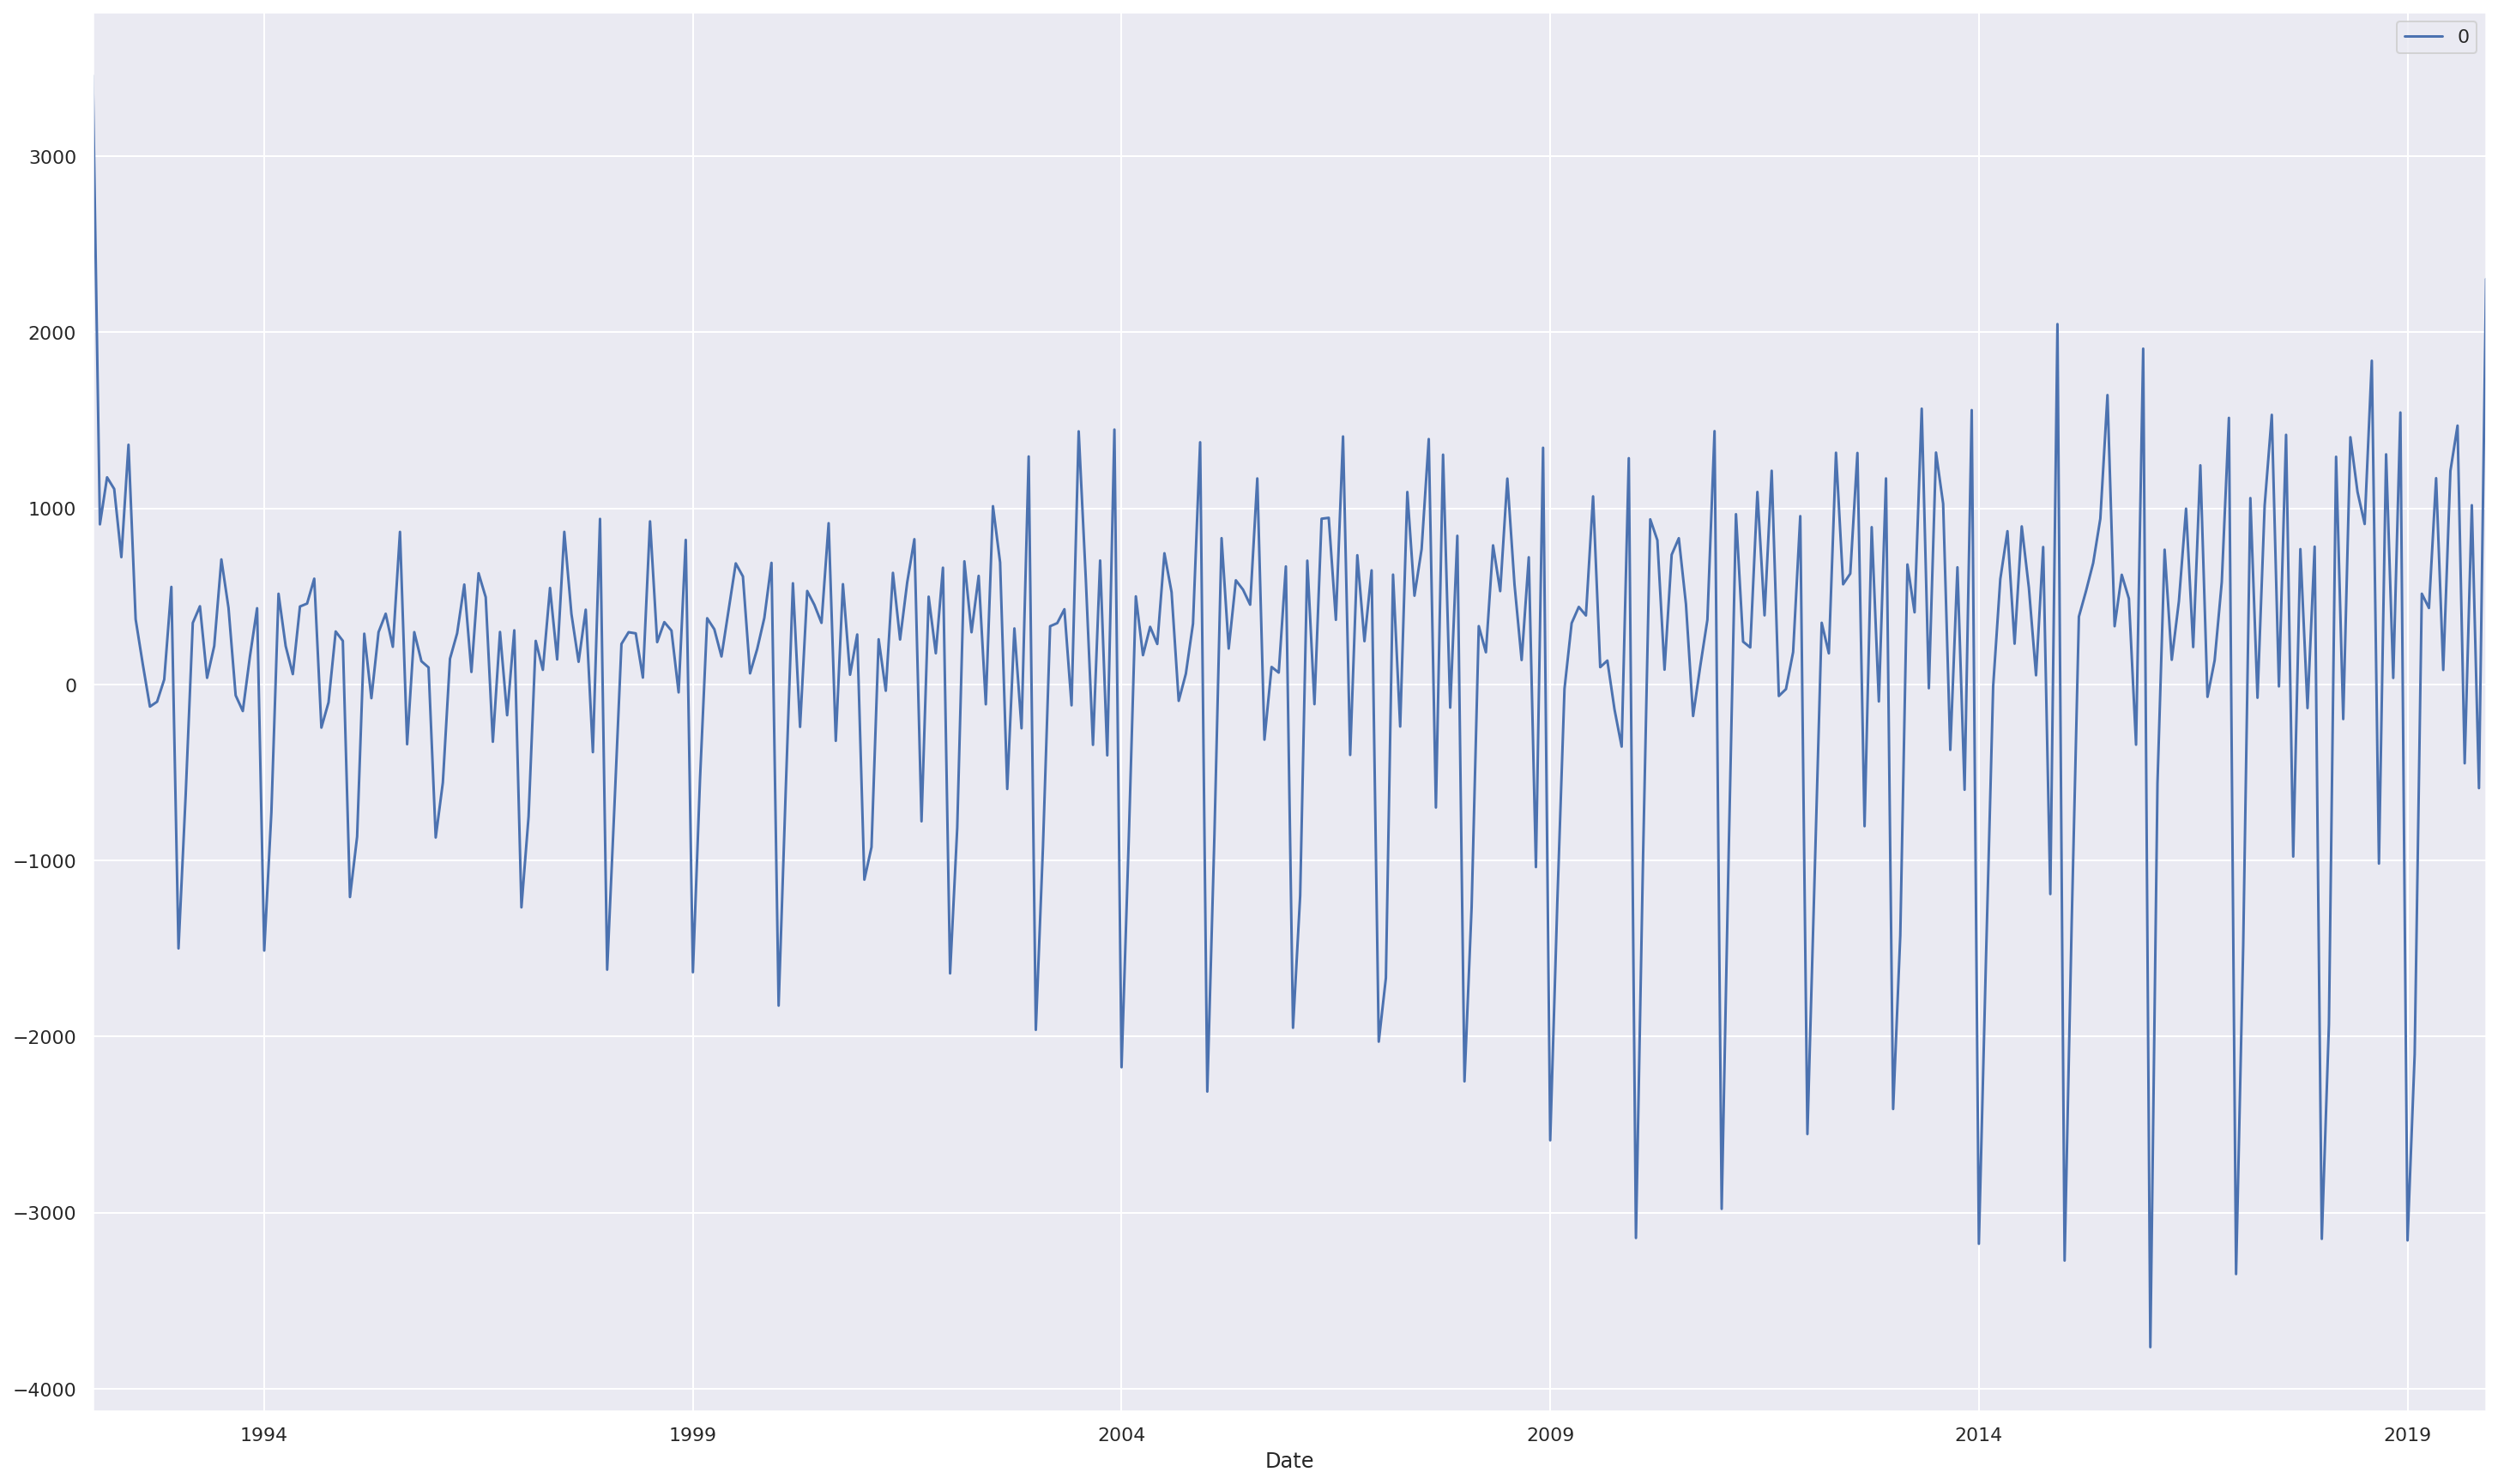

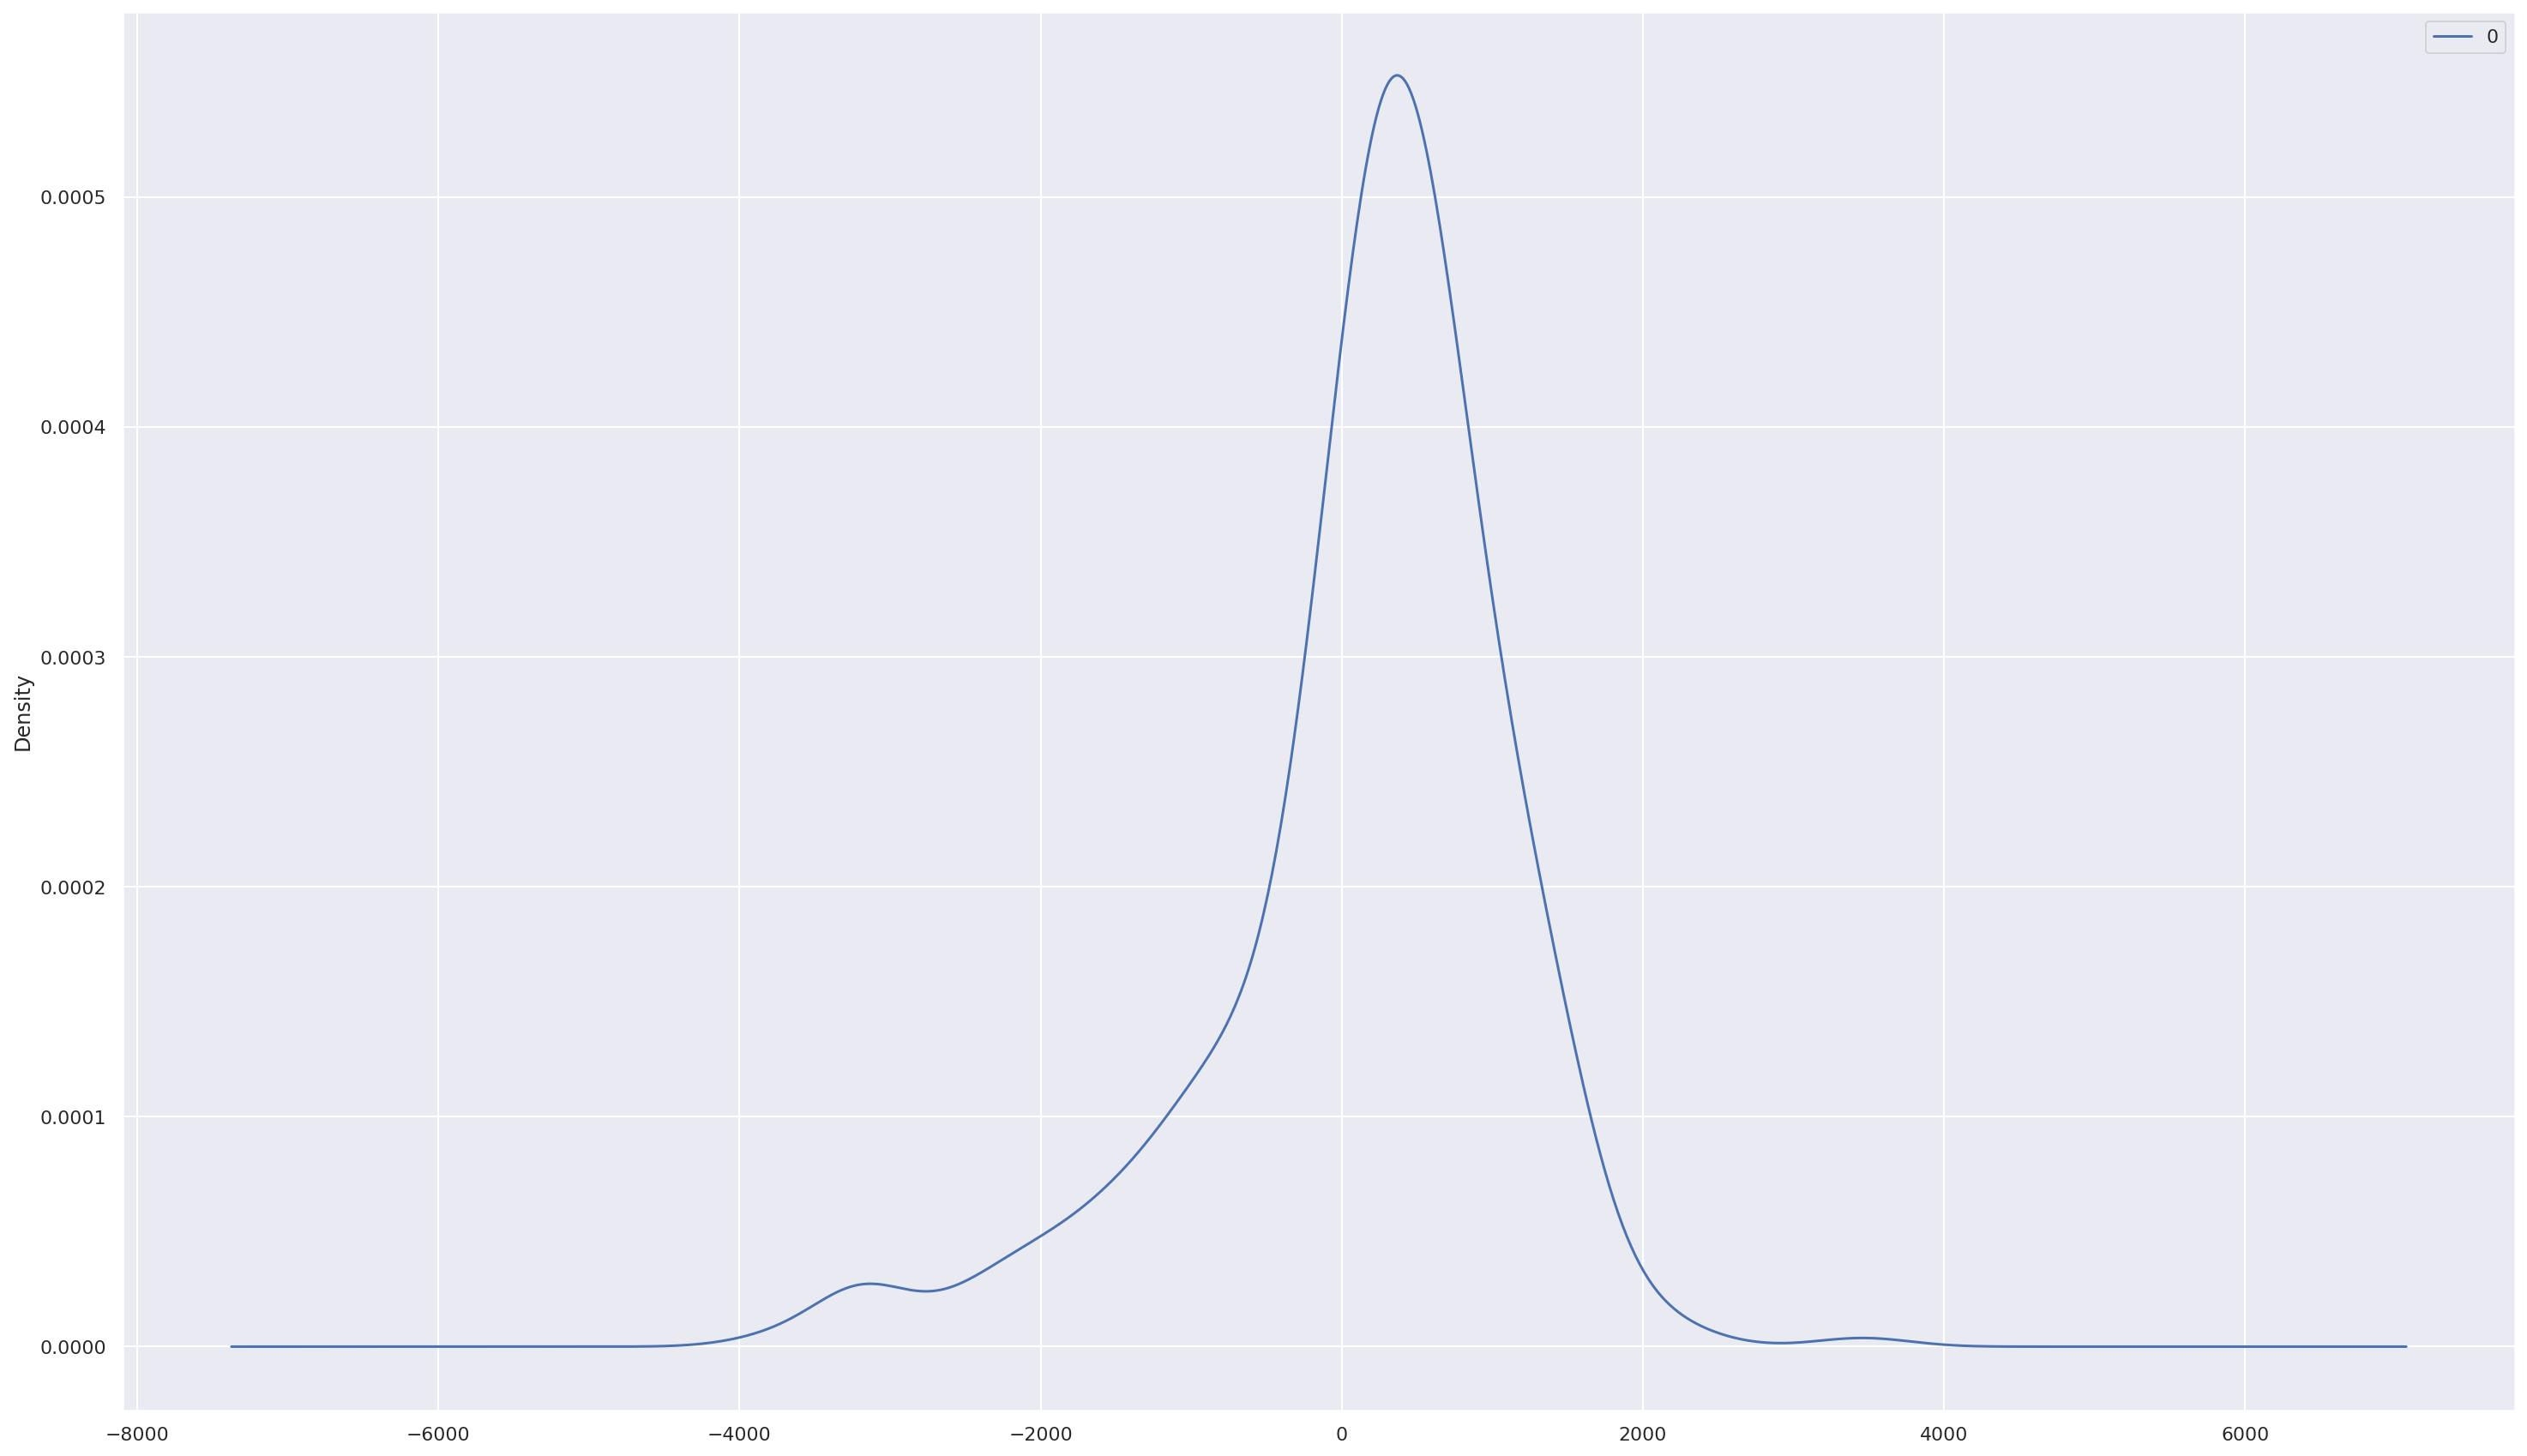

In [ ]:
# line plot of residuals
residuals = pd.DataFrame(results_AR.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show();

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

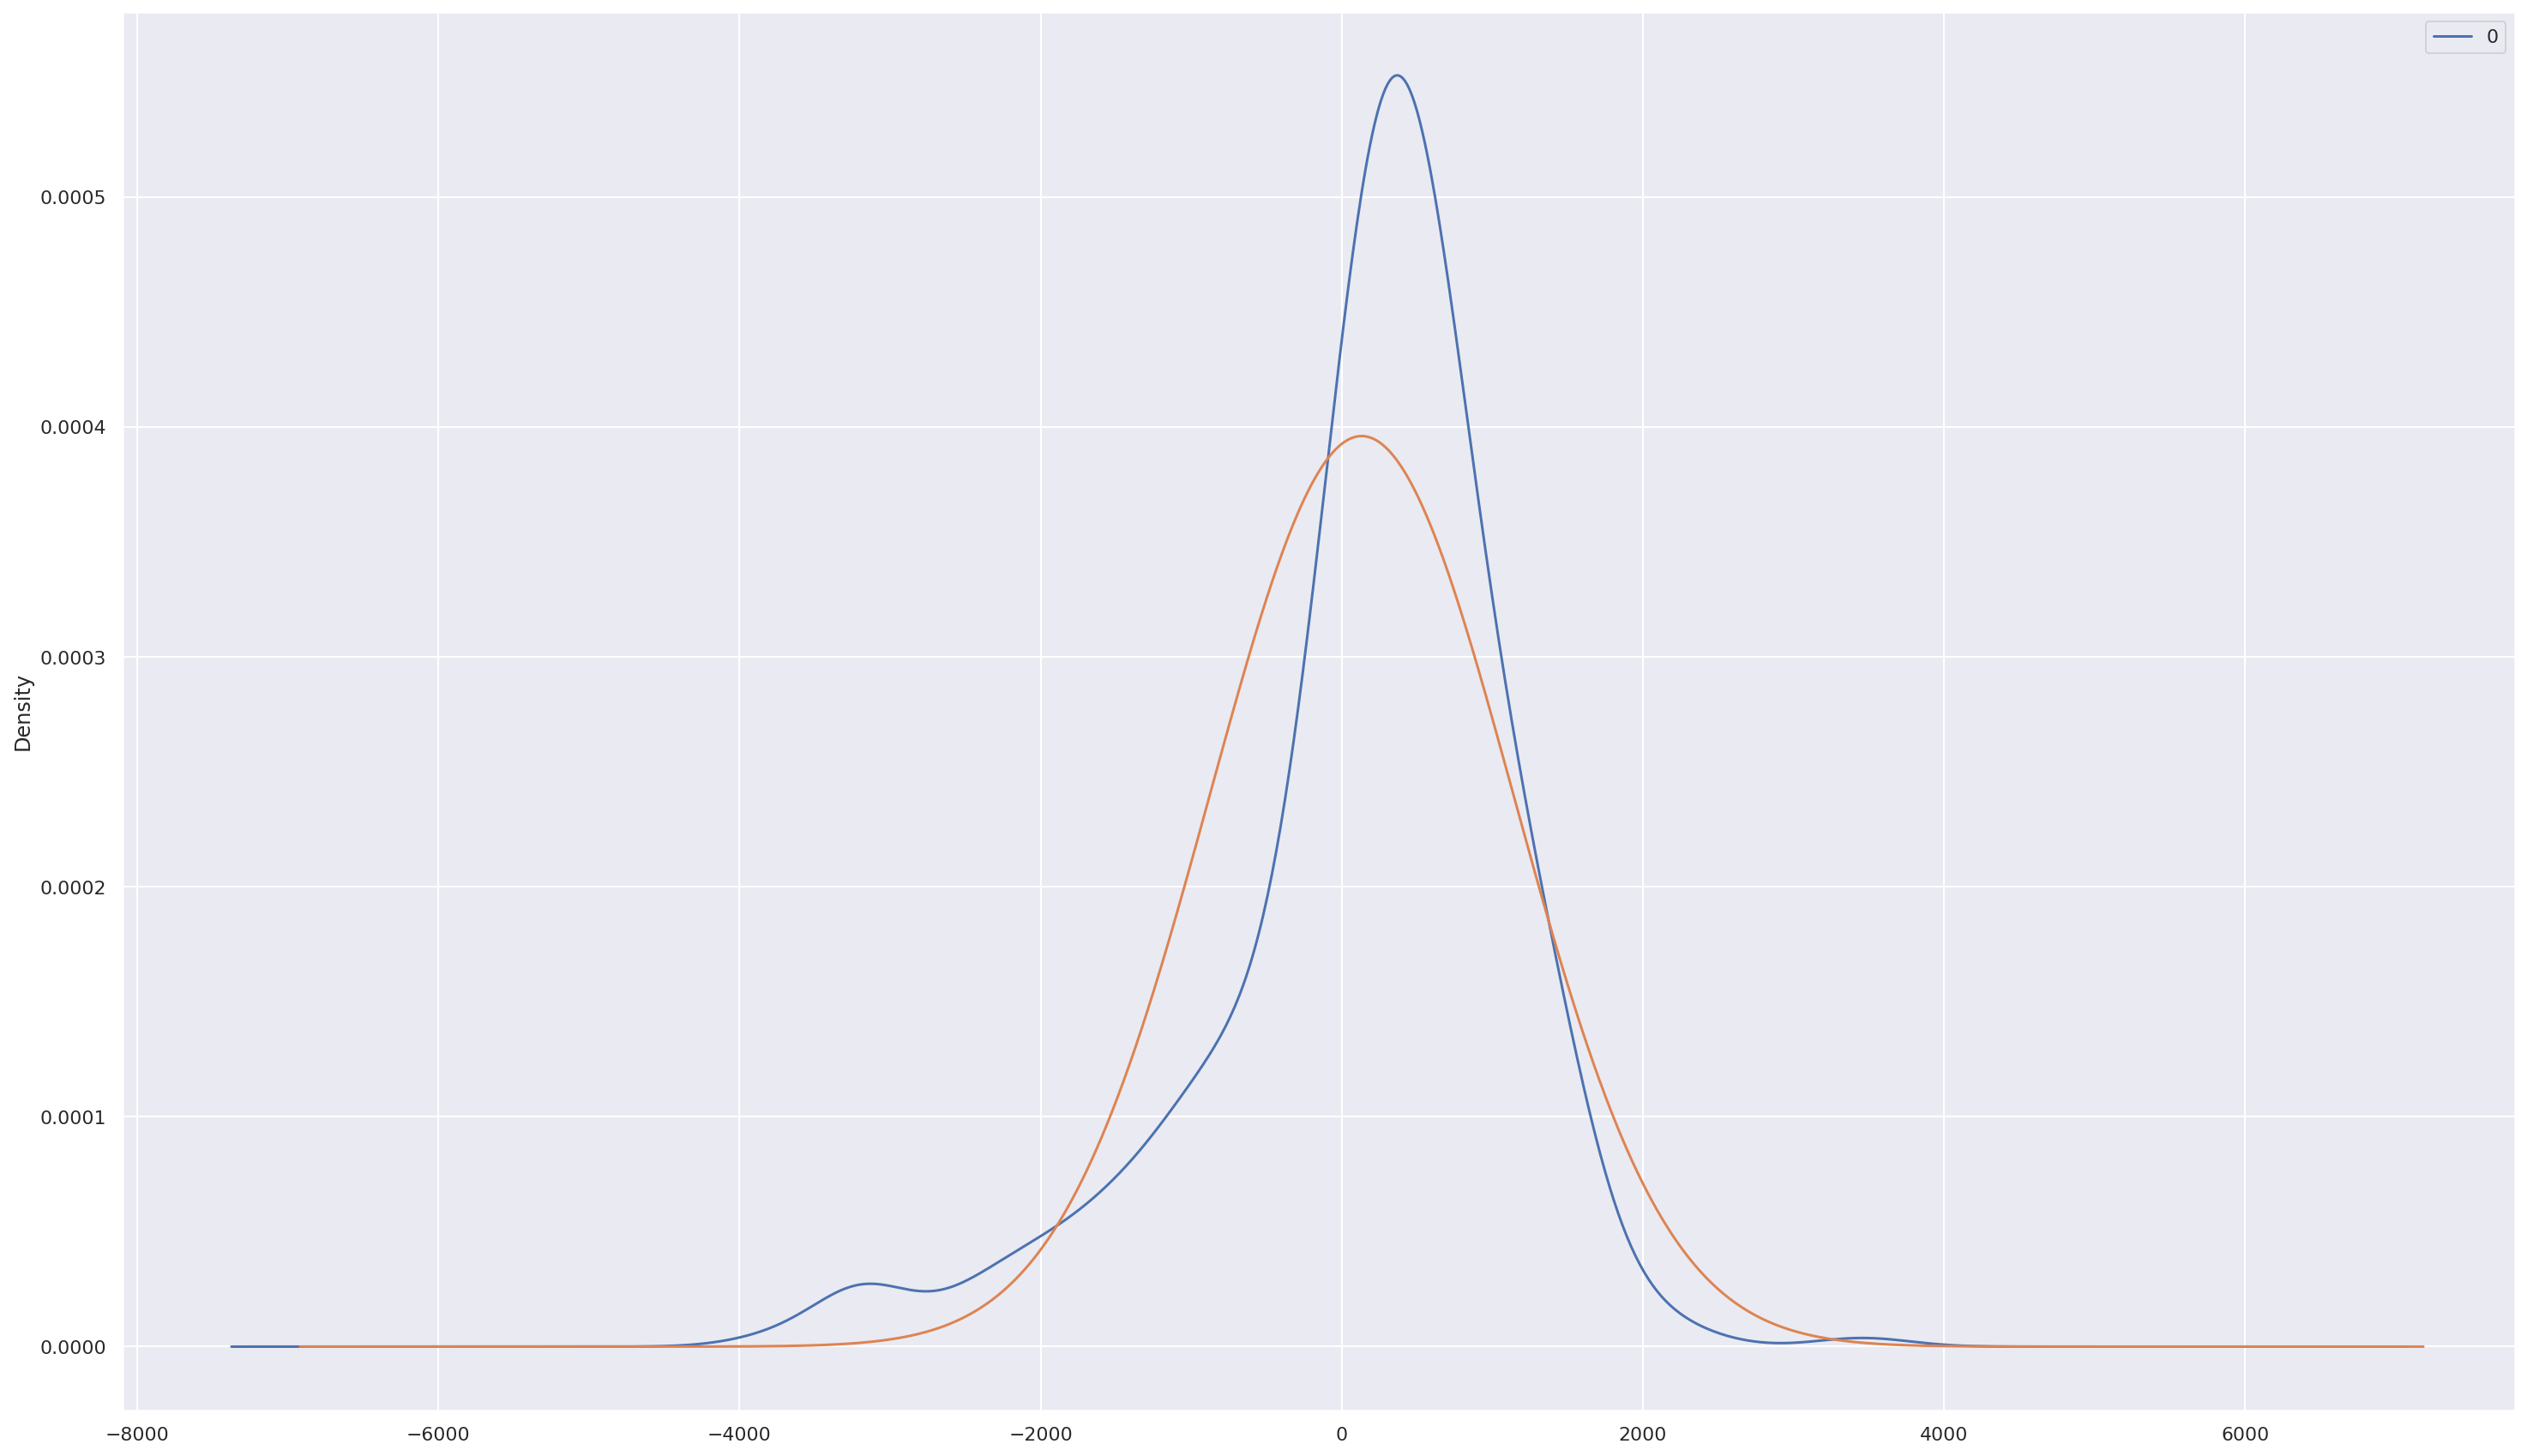

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
variance = np.var(residuals)
mu = np.mean(residuals)
sigma = math.sqrt(variance)
x = np.linspace(mu - 7*sigma, mu + 7*sigma,10000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), residuals.plot(kind='kde'))

plt.show()

In [ ]:
y=stats.norm.pdf(x, mu, sigma)


array([9.06797745e-15, 9.17974334e-15, 9.29285832e-15, ...,
       9.29285832e-15, 9.17974334e-15, 9.06797745e-15])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51473f4b-c066-448b-9585-b1955fea67d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>